<a href="https://colab.research.google.com/github/RaianaSeixas/ANN/blob/master/000_ANN_parte_002_XY_M%C3%A9tricas_D10_OUT_4_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [657]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# este comando clona o diretorio github ucfilho/ANN no colaboratory research
!git clone https://github.com/RaianaSeixas/ANN #clonar do Github
%cd ANN
#!ls
print("Hello world"+"\n"+"I'm evolving!!!"+"\n")

%matplotlib inline

Cloning into 'ANN'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 42 (delta 12), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (42/42), done.
/content/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN/ANN
Hello world
I'm evolving!!!



In [658]:
!ls

000_ANN_Gera_Matriz_para_ser_usada_set_26_2019.ipynb  X_DAT_B_set_17_2019.csv
000_ANN_parte_001_XY_dados_out_01_2019.ipynb	      X_DAT_set_17_2019.csv
000_ANN_parte_002_B_D10_OUT_1_2019.ipynb	      XY_D10_out_1_2019.csv
000_Gerenciador_DE_var_F_CR_STAT_set_27_2019.ipynb    Y_DAT_B_set_17_2019.csv
imput_ANN_D10_6F.zip				      Y_DAT_set_17_2019.csv


In [0]:
# sigmoid function
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

def tasig(x,deriv=False):
    if(deriv==True):
        return 1-x*x
    return 2/(1+np.exp(-2*x))-1

# purelin function
def purelin(x,deriv=False):
    if(deriv==True):
        return 1
    return x

In [0]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [0]:
def QUALIDADE(yobs,ycal):
  #yobs=yobs.to_numpy()
  yobs=np.array(yobs)
  #ycal=ycal.to_numpy()
  ycal=np.array(ycal)
  N=len(yobs)
  Soma=0
  for i in range(N):
    Soma=Soma+(yobs[i]-ycal[i])**2
  Soma=(Soma/N)**0.5
  return Soma

In [0]:
def R2(yobs,ycal):
  yobs=np.array(yobs)
  ycal=np.array(ycal)
  N=len(yobs)
  SQresiduos=0
  SQexp=0
  ycal_medio=y_calc.mean().item()
  for i in range(N):
    SQresiduos=SQresiduos+(yobs[i]-ycal[i])**2
    SQexp=SQexp+(ycal[i]-ycal_medio)**2
  coef=1-(SQresiduos/(SQresiduos+SQexp))
  return coef


In [664]:
# leitura dos dados
DAT=pd.read_csv("XY_D10_out_1_2019.csv")
# separa as colunas de interesse
Index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()

pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)
#print(Dat_Select)
print(Dat_Select.head())

   DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X     NP  \
0         21.655535     1.221355       0.2         0.0      0.0  100.0   
1         21.514089     1.213378       0.3         0.0      0.0  100.0   
2         21.295827     1.201068       0.4         2.0      2.0  100.0   
3         21.188552     1.195018       0.5         0.0      0.0  100.0   
4         21.769821     1.227801       0.6         1.0      2.0  100.0   

         Fo       CRo      fmin         fmax   AD_fmin   AD_fmax         F  \
0  0.972856  0.760538  0.057549  1805.235510  1.000000  0.374682  0.277668   
1  0.277668  0.260366  0.057549   317.197512  1.000000  0.065835  0.173981   
2  0.173981  0.453169  0.022278    49.847938  0.387115  0.010346  0.677145   
3  0.677145  0.947536  0.022278    33.373213  0.387115  0.006927  0.059762   
4  0.059762  0.155327  0.014697     9.059640  0.255377  0.001880  0.949367   

         CR  
0  0.260366  
1  0.453169  
2  0.947536  
3  0.155327  
4  0.933255  


In [0]:
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)

In [666]:
# obtem as variaveis independentes (treino e teste)
# separa os dados em treino e teste
train=DAT.sample(frac=0.8,random_state=None) 
test=DAT.drop(train.index)
'''
x_train=train.iloc[:,[1,2,3,4,6,7,10,11]]
x_test=test.iloc[:,[1,2,3,4,6,7,10,11]]
X_OLD=DAT_OLD.iloc[:,[1,2,3,4,6,7,10,11]]
'''
#Add fmax e fmin
x_train=train.iloc[:,[1,2,3,4,6,7,8,9,10,11]]
x_test=test.iloc[:,[1,2,3,4,6,7,8,9,10,11]]
X_OLD=DAT_OLD.iloc[:,[1,2,3,4,6,7,8,9,10,11]]
print(x_train.head())

    DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X        Fo       CRo      fmin  \
49    -0.695994      0.00         0.0      1.0 -0.430203 -0.162475 -0.990942   
3      0.651328     -0.25        -1.0     -1.0  0.362938  0.949562 -0.999974   
2      0.659696     -0.50         1.0      1.0 -0.662875 -0.068933 -0.999974   
42    -0.922858      0.50         1.0      1.0 -0.084589 -0.554020 -1.000000   
33    -0.393398      0.50         0.0      1.0  0.425882 -0.632270 -0.975749   

        fmax   AD_fmin   AD_fmax  
49 -0.988972 -0.197878  0.901072  
3  -0.981526 -0.225770 -0.986133  
2  -0.972406 -0.225770 -0.979288  
42 -1.000000 -1.000000 -0.999999  
33 -0.960152 -0.247401 -0.139004  


In [667]:
# obtem as variaveis dependentes (treino e teste)
#Index=[2,3,4,5]
Index=[12] #F
#Index=[13] #CR
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]
print(y_train.head())

           F
49  0.495032
3  -0.895736
2   0.362938
42 -0.729215
33  0.325664


In [0]:
X_NOME=[  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','Fo','CRo',
           'AD_fmin','AD_fmax']
Y_NOME=['F']   
#Y_NOME=['CR']   

In [0]:
# input dataset
Neuron_input=len(X_NOME)
Neuron_hidden=9
Neuron_output=1
Learning_rate=0.01
omega=0.9
Epoch=50000

In [0]:

#y_old=DAT['TC1']
#DAT=normatize(DAT)
Y_train=y_train
X_train=x_train
#print(X.head())

In [671]:
X_train=X_train.loc[X_train['FRAC Its']==X_train['FRAC Its'],X_NOME].values
y=Y_train.loc[Y_train['F']==Y_train['F'],['F']].values


# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((Neuron_input,Neuron_hidden)) - 1
syn1 = 2*np.random.random((Neuron_hidden,Neuron_output)) - 1


for j in range(Epoch):

    # Feed forward through layers 0, 1, and 2
    l0 = X_train
    #l1 = sigmoid(np.dot(l0,syn0))
    l1 = tasig(np.dot(l0,syn0))
    l2 = purelin(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = y - l2

    if (j% 10000) == 0:
        print("Epoch %d"%(j) +" error:" + str(np.mean(np.abs(l2_error))))

    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*purelin(l2,deriv=True)
    l1_error = l2_delta.dot(syn1.T)
    #l1_delta = l1_error * sigmoid(l1,deriv=True)
    l1_delta = l1_error * tasig(l1,deriv=True)    

    syn1 += l1.T.dot(l2_delta)*Learning_rate
    syn0 += l0.T.dot(l1_delta)*Learning_rate



Epoch 0 error:0.8283061304369039
Epoch 10000 error:0.06054630685133073
Epoch 20000 error:0.04510928926819968
Epoch 30000 error:0.034835868449416406
Epoch 40000 error:0.026927289931216767


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


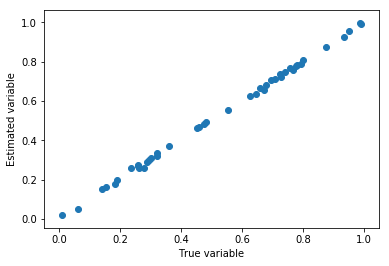

In [672]:
#'''
#DAT=pd.read_csv(Arquivo,sep='\t')
y_obs=y_train
y_calc=np.reshape(l2,len(l2))
y_calc=pd.DataFrame({'y_calc':y_calc})
#y_old=pd.DataFrame({'y_old':y_old})
Y_OLD=pd.DataFrame(Y_OLD)
Y_OLD.columns = ["y_calc"]
y_calc=Original(y_calc,Y_OLD)

y_obs.columns = ["y_calc"]
y_obs=Original(y_obs,Y_OLD)
y_obs_train=np.copy(y_obs)
y_calc_train=np.copy(y_calc)

plt.scatter(y_obs,y_calc)
plt.xlabel("True variable")
plt.ylabel("Estimated variable")
#plt.xlim((0,1))
#plt.ylim((0,1))
plt.show()
#'''

In [0]:
x_test=x_test.loc[x_test['FRAC Its']==x_test['FRAC Its'],X_NOME].values
#y=Y_test.loc[Y_test['Resistence']==Y_test['Resistence'],['Resistence']].values

In [0]:

#print(X_test)
l0 = x_test
#l1 = sigmoid(np.dot(l0,syn0))
l1 = tasig(np.dot(l0,syn0))
l2 = purelin(np.dot(l1,syn1))
y_calc_test=np.reshape(l2,len(l2))
y_calc_test=pd.DataFrame({'y_calc':y_calc_test})
y_calc_test=Original(y_calc_test,Y_OLD)

In [675]:
y_obs=y_test
y_obs.columns = ["y_calc"]
y_obs=Original(y_obs,Y_OLD)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
y_test_max=y_calc_test.max()
y_test_min=y_calc_test.min()

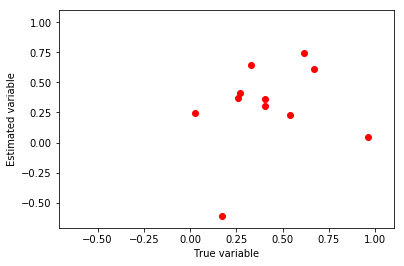

In [677]:
plt.scatter(y_obs,y_calc_test,color='r')
plt.xlabel("True variable")
plt.ylabel("Estimated variable")

min=y_test_min.item()-0.1
if y_test_max.item()>1:
  max=y_test_max.item()+0.1
else:
  max=1.1

plt.xlim((min,max))
plt.ylim((min,max))
plt.show()

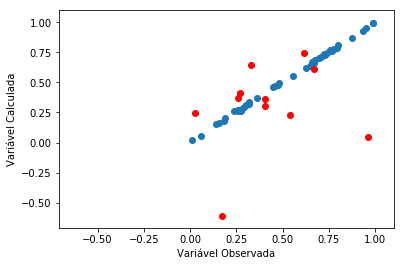

In [678]:
plt.scatter(y_obs_train,y_calc_train)
plt.scatter(y_obs,y_calc_test,color='r')

#plt.ylabel("Estimated variable")
#plt.xlabel("True variable")
plt.ylabel("Variável Calculada")
plt.xlabel("Variável Observada")

plt.xlim((min,max))
plt.ylim((min,max))
plt.show()

In [679]:
Erro_treino=QUALIDADE(y_obs_train,y_calc_train)
R2_treino=R2(y_obs_train,y_calc_train)
print("RMSE treino=",Erro_treino, 'R2_treino',R2_treino)
Erro_teste=QUALIDADE(y_obs,y_calc_test)
R2_teste=R2(y_obs,y_calc_test)
print("RMSE teste=",Erro_teste,'R2_teste',R2_teste)

RMSE treino= [0.00978821] R2_treino [0.99869896]
RMSE teste= [0.39884055] R2_teste [0.51878642]


In [681]:
print('y_test_max',y_test_max.item())
print('y_test_min',y_test_min.item())

y_test_max 0.7444532339176136
y_test_min -0.6095238575970255
